In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import ImageSequenceClip, concatenate_videoclips
import os


# Load the audio file 

In [2]:
# SET AUDIO FILE PATH
audio_file = "music1.mp3"  #Change this to your actual MP3 file

# Load audio
y, sr = librosa.load(audio_file)


# Beats Detections

In [3]:
# Compute onset strength envelope
onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)

# Detect peaks (onset events)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr, backtrack=True)

#If you need more frequent changes:
#onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr, backtrack=True, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.2, wait=5)
#Lower delta → More frequent beat detections.
#Lower wait → Detects more rapid changes.

# Convert detected onsets to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Combine with beat tracking (denser beat detection)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, units="frames")
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Merge both detections (sorted unique times)
all_times = sorted(set(np.concatenate((onset_times, beat_times))))

print(f"Detected More Beats at Times: {all_times}")


Detected More Beats at Times: [0.046439909297052155, 0.25541950113378686, 0.301859410430839, 0.6501587301587302, 0.8126984126984127, 0.8591383219954648, 1.0913378684807256, 1.1377777777777778, 1.207437641723356, 1.253877551020408, 1.3467573696145125, 1.3699773242630386, 1.4396371882086167, 1.5789569160997732, 1.7182766439909296, 1.8808163265306121, 1.9272562358276644, 2.1130158730158732, 2.345215419501134, 2.391655328798186, 2.6006349206349206, 2.8792743764172335, 2.9024943310657596, 3.1346938775510202, 3.3901133786848074, 3.436553287981859, 3.645532879818594, 3.900952380952381, 3.9706122448979593, 4.179591836734694, 4.435011337868481, 4.481451247165533, 4.504671201814059, 4.690430839002268, 4.9458503401360545, 4.992290249433107, 5.038730158730159, 5.317369614512471, 5.363809523809524, 5.433469387755102, 5.456689342403628, 5.526349206349207, 5.61922902494331, 5.735328798185941, 5.897868480725624, 5.944308390022676, 6.0836281179138325, 6.222947845804988, 6.501587301587302, 6.52480725623

# Plot the audio waveform 

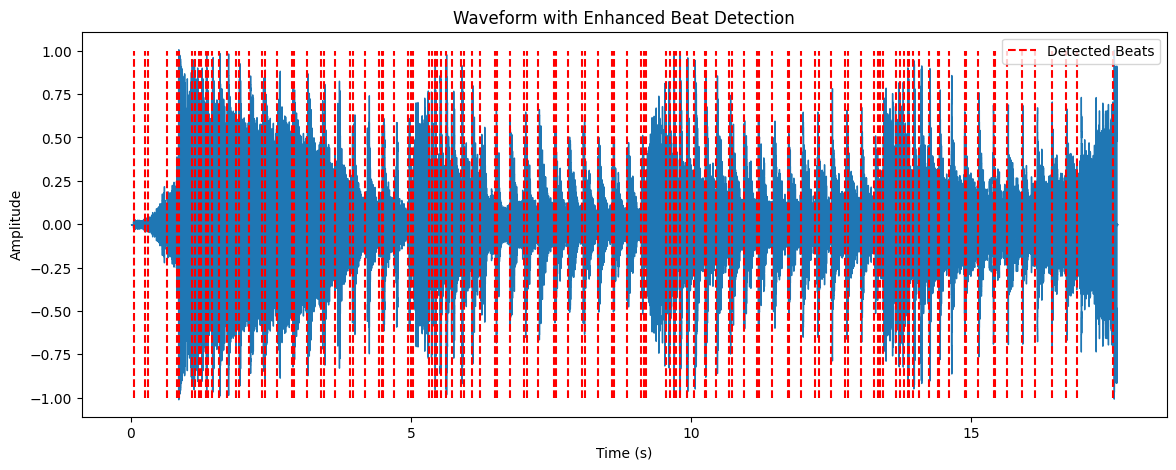

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.vlines(all_times, ymin=-1, ymax=1, color="r", linestyle="dashed", label="Detected Beats")
plt.title("Waveform with Enhanced Beat Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [5]:
countof = len(all_times)
print(countof)

118


# Load Images & Sync to Beats

In [6]:
# SET IMAGE DIRECTORY PATH
images_folder = "images"  #Change this to your actual image folder

# Get all images from the directory
image_files = sorted(
    [f for f in os.listdir(images_folder) if f.endswith((".png", ".jpg", ".jpeg"))]
)

if not image_files:
    raise FileNotFoundError("No images found in the specified folder.")

# Full paths to images
image_paths = [os.path.join(images_folder, img) for img in image_files]

# Ensure enough images for detected beats
num_beats = len(all_times)
num_images = len(image_files)

if num_images < num_beats:
    print("Not enough images for each beat. Some beats will reuse images.")

# Create Video

In [7]:

image_clips = []
for i in range(num_beats):
    img_index = i % num_images  # Loop images if there aren't enough
    img_path = image_paths[img_index]

    # Duration between beats
    duration = all_times[i + 1] - all_times[i] if i < num_beats - 1 else 0.2  # Default to 0.2s for last beat

    # Create an image clip for this beat
    clip = ImageSequenceClip([img_path], durations=[duration])
    image_clips.append(clip)

In [8]:

# Concatenate all image clips
final_clip = concatenate_videoclips(image_clips, method="compose")

# 🔹 SET OUTPUT VIDEO FILE NAME
output_path = "another_one.mp4"  #Change this to your desired output file

# Export the final video with the original song as audio
final_clip.write_videofile(output_path, codec="libx264", fps=24, audio=audio_file, audio_fps=sr)

print(f" Video successfully created: {output_path}")

Moviepy - Building video another_one.mp4.
Moviepy - Writing video another_one.mp4



Moviepy - Done !
Moviepy - video ready another_one.mp4
 Video successfully created: another_one.mp4
